# EXPLORATORY DATA ANALYSIS (EDA)

**EDA** | What users are there? | What products? Who buys the most? | What product is repeated the most? | Are there outliers? 

## Step 1: Load & inspect data

In [3]:
import pandas as pd

import warnings
from pandas.errors import PerformanceWarning

warnings.simplefilter('ignore', PerformanceWarning)

# 1) Load raw tables
orders = pd.read_csv('data/orders.csv')
prior  = pd.read_csv('data/order_products__prior.csv')
train  = pd.read_csv('data/order_products__train.csv')
prods  = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
depts  = pd.read_csv('data/departments.csv')

# 2) Quick peek
print(orders.shape, prior.shape, train.shape)
orders.head()


(3421083, 7) (32434489, 4) (1384617, 4)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Step 2: Data upload and initial summary

In [18]:
import pandas as pd

# Carga de los datasets
orders = pd.read_csv('data/orders.csv')
prior = pd.read_csv('data/order_products__prior.csv')
products = pd.read_csv('data/products.csv')

# Vista rápida de cada DataFrame
print("Orders:")
print(orders.info())
print(orders.head())

print("\nOrder Products (prior):")
print(prior.info())
print(prior.head())

print("\nProducts:")
print(products.info())
print(products.head())


Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_p

## Step 3: Unique dimensions and values

In [22]:
print(f"\nNumber of orders: {orders.shape[0]}")
print(f"Number of prior order rows: {prior.shape[0]}")
print(f"Number of products: {products.shape[0]}")

print(f"\nUnique users: {orders['user_id'].nunique()}")
print(f"Unique products: {products['product_id'].nunique()}")
print(f"Unique orders: {orders['order_id'].nunique()}")



Number of orders: 3421083
Number of prior order rows: 32434489
Number of products: 49688

Unique users: 206209
Unique products: 49688
Unique orders: 3421083


## Step 4: Checking for nulls and duplicates

In [23]:
# Nulos
print("\nNull values per column (orders):")
print(orders.isnull().sum())
print("\nNull values per column (prior):")
print(prior.isnull().sum())
print("\nNull values per column (products):")
print(products.isnull().sum())

# Duplicados
print("\nDuplicated rows (orders):", orders.duplicated().sum())
print("Duplicated rows (prior):", prior.duplicated().sum())
print("Duplicated rows (products):", products.duplicated().sum())



Null values per column (orders):
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Null values per column (prior):
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Null values per column (products):
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Duplicated rows (orders): 0
Duplicated rows (prior): 0
Duplicated rows (products): 0


## Step 5: Basic descriptive statistics

In [24]:
# Estadísticas de columnas numéricas
print("\nDescribe orders:")
print(orders.describe())

print("\nDescribe prior:")
print(prior.describe())

print("\nDescribe products:")
print(products.describe())



Describe orders:
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01            7.000000e+00  
75%         1.600000e+01            1.5

## Step 6: Most popular products and most active users

In [27]:
# Top 10 most purchased products
top_products = (
    prior['product_id']
    .value_counts()
    .head(10)
    .to_frame()
    .merge(products, left_index=True, right_on='product_id')
)

print("\nTop 10 most purchased products:")
print(top_products[['product_id', 'product_name', 'aisle_id', 'department_id', 'product_id']])

# Top 10 most active users (more orders)
top_users = (
    orders['user_id']
    .value_counts()
    .head(10)
)
print("\nTop 10 users with the most orders:")
print(top_users)



Top 10 most purchased products:
       product_id            product_name  aisle_id  department_id  product_id
24851       24852                  Banana        24              4       24852
13175       13176  Bag of Organic Bananas        24              4       13176
21136       21137    Organic Strawberries        24              4       21137
21902       21903    Organic Baby Spinach       123              4       21903
47208       47209    Organic Hass Avocado        24              4       47209
47765       47766         Organic Avocado        24              4       47766
47625       47626             Large Lemon        24              4       47626
16796       16797            Strawberries        24              4       16797
26208       26209                   Limes        24              4       26209
27844       27845      Organic Whole Milk        84             16       27845

Top 10 users with the most orders:
user_id
75124     100
173431    100
127158    100
96192     10

## Step 7: Distributions and visualizations

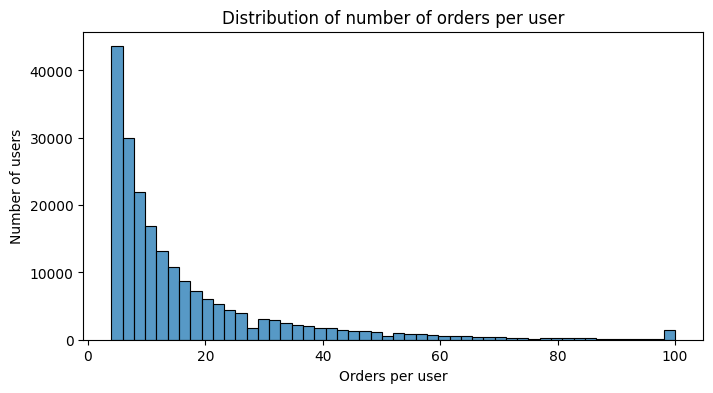

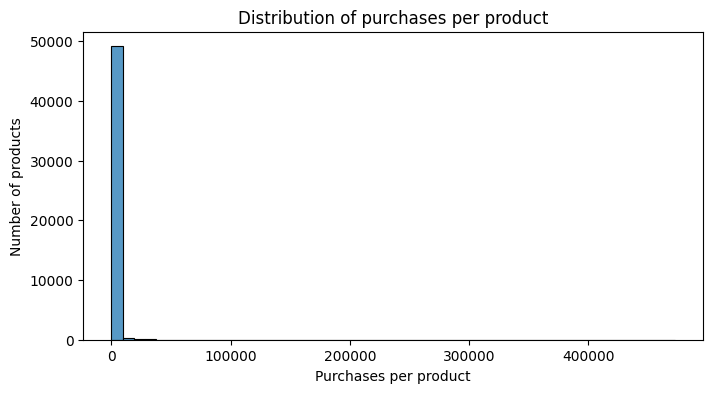

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of orders by user
plt.figure(figsize=(8,4))
orders_per_user = orders['user_id'].value_counts()
sns.histplot(orders_per_user, bins=50, kde=False)
plt.xlabel('Orders per user')
plt.ylabel('Number of users')
plt.title('Distribution of number of orders per user')
plt.show()

# Distribution of purchases by product
plt.figure(figsize=(8,4))
products_bought = prior['product_id'].value_counts()
sns.histplot(products_bought, bins=50, kde=False)
plt.xlabel('Purchases per product')
plt.ylabel('Number of products')
plt.title('Distribution of purchases per product')
plt.show()


### User Behavior

<Axes: >

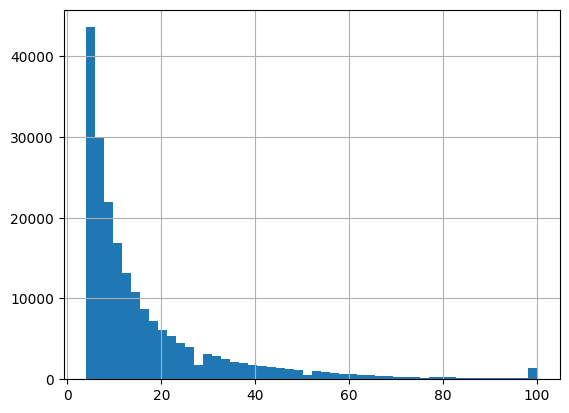

In [9]:
# Orders per user
orders.user_id.value_counts().hist(bins=50)

### Popular products

In [10]:
popular = prior.product_id.value_counts().head(10)
popular_names = prods.set_index('product_id').loc[popular.index].product_name
print(popular_names)

product_id
24852                    Banana
13176    Bag of Organic Bananas
21137      Organic Strawberries
21903      Organic Baby Spinach
47209      Organic Hass Avocado
47766           Organic Avocado
47626               Large Lemon
16797              Strawberries
26209                     Limes
27845        Organic Whole Milk
Name: product_name, dtype: object


### Reorder rate

In [11]:
prior.reordered.mean()

np.float64(0.5896974667922161)

## Step 8: Checking concrete examples

In [30]:
# What products did a specific user purchase (example with the first user_id)?
example_user = orders['user_id'].iloc[0]
user_orders = orders[orders['user_id'] == example_user]['order_id']
user_products = prior[prior['order_id'].isin(user_orders)]
print(f"\nProducts purchased by the user {example_user}:")
print(user_products.merge(products, on='product_id')[['order_id', 'product_id', 'product_name']].head(10))



Products purchased by the user 1:
   order_id  product_id            product_name
0    431534         196                    Soda
1    431534       12427     Original Beef Jerky
2    431534       10258              Pistachios
3    431534       25133   Organic String Cheese
4    431534       10326     Organic Fuji Apples
5    431534       17122       Honeycrisp Apples
6    431534       41787          Bartlett Pears
7    431534       13176  Bag of Organic Bananas
8    473747         196                    Soda
9    473747       12427     Original Beef Jerky


## User Behavior

In [35]:
# Orders per user 
orders_per_user = orders['user_id'].value_counts()
print("Orders per user (describe):")
print(orders_per_user.describe())

# Diversity of products per user
user_unique_products = (
    prior_with_users.groupby('user_id')['product_id']
    .nunique()
    .sort_values(ascending=False)
)
print("diversity of products per user (describe):")
print(user_unique_products.describe())


Orders per user (describe):
count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: count, dtype: float64
diversity of products per user (describe):
count    206209.000000
mean         64.536238
std          56.592339
min           1.000000
25%          25.000000
50%          48.000000
75%          86.000000
max         726.000000
Name: product_id, dtype: float64


##  What is it?
**Basket Analytics**: It is a data science method used to examine the products that customers buy together in a certain time interval and the relationships between these products.

## What is it used for?

**Forecasting and Strategy Development**: It allows us to predict customers' future purchases based on their shopping habits, so that we can organize the market in a way that will increase our sales, such as daily/hourly.

**Example**: We can emphasize more leisure consumption products on different days of the week, for example on Saturday.

**Product Placement and Shelf Layout**: If we can understand which products are bought together, we can optimize in-store product placement and shelf layout to increase profits.

**Example**: People who buy cola buy chips, people who buy salad ingredients buy lemons, people who buy organic vegetables buy another organic vegetable.

**Campaign and Discount Strategies**: When we know which products are bought together, we can increase our sales by campaigning for one and slightly increasing the price of the other, without reducing our profit, since we know that those who buy one will buy the other.

**Example**: If the purchase of potato chips increases with the purchase of Coke, we can apply a discount strategy such as 50% discount on potato chips for those who buy Coke.

**Inventory Management**: It can be used to regulate the stock of products that increase in sales seasonally or to ensure that the stocks of products sold together are kept equal or close.

**Example**: Keeping more stock of umbrellas during rainy periods or keeping close stock of Shampoo and Conditioner.

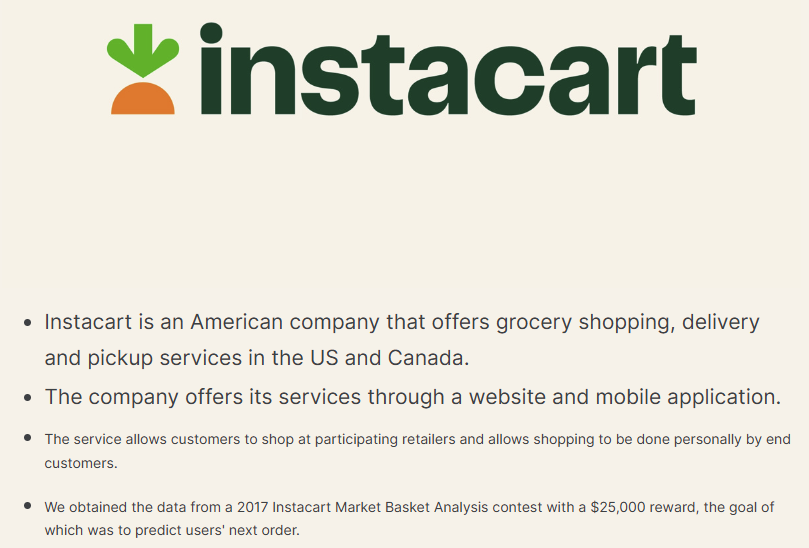

In [5]:
orders = pd.read_csv('data/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


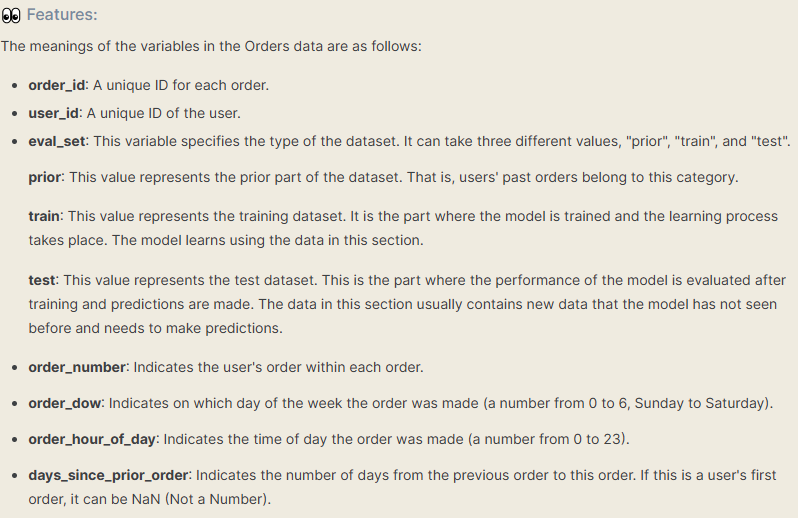

In [6]:
orders.shape

(3421083, 7)

In [7]:
orders["day_hour"] = [f"{day}-{hour}" for day,hour in zip(orders["order_dow"],orders["order_hour_of_day"])]

In [8]:
orders["user_day"] = [f"{user}-{day}" for user,day in zip(orders["user_id"],orders["order_dow"])]

In [9]:
orders = orders[orders["eval_set"]=="prior"]

In [10]:
orders.shape

(3214874, 9)

In [12]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
day_hour                       0
user_day                       0
dtype: int64

In [13]:
orders.duplicated().sum()

np.int64(0)

## orders_products_prior

In [17]:
order_products  = pd.read_csv('data/order_products__prior.csv')

In [18]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
order_products.duplicated().sum()

np.int64(0)

In [20]:
df = pd.merge(orders,order_products, how="inner", on="order_id")[["order_id","user_id","product_id","day_hour","user_day"]]
df.head()

,order_id,user_id,product_id,day_hour,user_day
0,2539329,1,196,2-8,1-2
1,2539329,1,14084,2-8,1-2
2,2539329,1,12427,2-8,1-2
3,2539329,1,26088,2-8,1-2
4,2539329,1,26405,2-8,1-2


In [21]:
df.shape

(32434489, 5)

In [22]:
df["product_id"].value_counts()

product_id
24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
31333         1
45378         1
42464         1
30451         1
28818         1
Name: count, Length: 49677, dtype: int64

In [23]:
df["product_id"].value_counts().mean()

np.float64(652.90756285605)

##  Statsmodels

In [26]:
import statsmodels.stats.api as sms

In [27]:
low_conf, up_conf = sms.DescrStatsW(df["product_id"].value_counts()).tconfint_mean()
print(f"Lower Confidence Interval: {low_conf:.0f}")
print(f"Upper Confidence Interval: {up_conf:.0f}")

Lower Confidence Interval: 611
Upper Confidence Interval: 695


In [28]:
important_products = df["product_id"].value_counts()[df["product_id"].value_counts() > low_conf].index
important_products

Index([24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845,
       ...
       43148, 28628,  5386, 32420,  4933, 17070, 18102, 24920, 42221, 30278],
      dtype='int64', name='product_id', length=7248)

In [29]:
df["user_id"].value_counts()

user_id
201268    3725
129928    3638
164055    3061
186704    2936
176478    2921
          ... 
170445       3
71648        3
38979        3
36918        3
36904        3
Name: count, Length: 206209, dtype: int64

In [30]:
df = df[df["product_id"].isin(important_products)]
df.shape

(28214831, 5)

In [31]:
df["product_id"].value_counts()

product_id
24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
24920       611
30278       611
18102       611
32420       611
42221       611
Name: count, Length: 7248, dtype: int64

In [32]:
low_conf, up_conf = sms.DescrStatsW(df["user_id"].value_counts()).tconfint_mean()
print(f"Lower Confidence Interval: {low_conf:.0f}")
print(f"Upper Confidence Interval: {up_conf:.0f}")

Lower Confidence Interval: 136
Upper Confidence Interval: 138


In [33]:
important_baskets = df["user_id"].value_counts()[df["user_id"].value_counts() > low_conf].index
important_baskets

Index([201268, 129928, 186704, 182401, 137629, 176478, 164055,  79106,  60694,
        13701,
       ...
       156126, 197728, 119603, 179028,  79151, 162295, 184729,  76870, 148272,
       170775],
      dtype='int64', name='user_id', length=60532)

In [34]:
df = df[df["user_id"].isin(important_baskets)]
df.shape

(20528009, 5)

In [35]:
df["user_id"].value_counts()

user_id
201268    3547
129928    3166
186704    2712
182401    2669
137629    2640
          ... 
43305      137
122417     137
184055     137
122810     137
122595     137
Name: count, Length: 60532, dtype: int64

In [36]:
basket = df.groupby(["user_id","product_id"])["order_id"].count().unstack().notnull()
basket

product_id,1,10,23,25,28,34,37,45,49,54,...,49615,49621,49628,49640,49644,49652,49655,49667,49680,49683
user_id,,,,,,,,,,,,,,,,,,,,,
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
206202,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
206206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


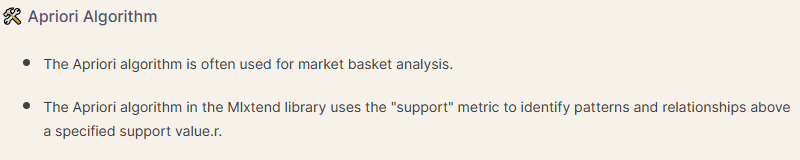

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
frequent_itemsets = apriori(basket,min_support=0.1,use_colnames=True,verbose=1)
frequent_itemsets.sort_values("support", ascending=False)

Processing 580 combinations | Sampling itemset size 5 4


,support,itemsets
53,0.545893,(24852)
40,0.531834,(21137)
22,0.499851,(13176)
43,0.464862,(21903)
57,0.417449,(26209)
...,...,...
1079,0.100211,"(21137, 45007, 24964, 21903)"
686,0.100211,"(26209, 5876, 21903)"
366,0.100079,"(21616, 40706)"
469,0.100063,"(24852, 39877)"


In [40]:
rules = association_rules(frequent_itemsets,metric="support",min_threshold=0.01)
rules.sort_values(by="lift")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1703,(24852),"(13176, 47209)",0.545893,0.273492,0.116897,0.214139,0.782981,1.0,-0.032400,0.924474,-0.379023,0.166404,-0.081696,0.320781
1698,"(13176, 47209)",(24852),0.273492,0.545893,0.116897,0.427424,0.782981,1.0,-0.032400,0.793094,-0.276155,0.166404,-0.260884,0.320781
218,(13176),(24852),0.499851,0.545893,0.222031,0.444195,0.813703,1.0,-0.050834,0.817025,-0.314018,0.269549,-0.223952,0.425463
219,(24852),(13176),0.545893,0.499851,0.222031,0.406730,0.813703,1.0,-0.050834,0.843038,-0.335184,0.269549,-0.186186,0.425463
1451,(24852),"(13176, 21137)",0.545893,0.322953,0.145477,0.266493,0.825176,1.0,-0.030821,0.923027,-0.318127,0.201110,-0.083392,0.358475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,(24964),"(46667, 22935)",0.351302,0.136275,0.104028,0.296120,2.172961,1.0,0.056154,1.227092,0.832126,0.271224,0.185065,0.529743
3667,"(47209, 24964)","(13176, 22935)",0.211657,0.215737,0.102673,0.485092,2.248533,1.0,0.057011,1.523113,0.704345,0.316188,0.343450,0.480505
3666,"(13176, 22935)","(47209, 24964)",0.215737,0.211657,0.102673,0.475917,2.248533,1.0,0.057011,1.504234,0.708010,0.316188,0.335210,0.480505
3668,"(47209, 22935)","(13176, 24964)",0.209691,0.216993,0.102673,0.489640,2.256482,1.0,0.057172,1.534225,0.704575,0.316882,0.348205,0.481402


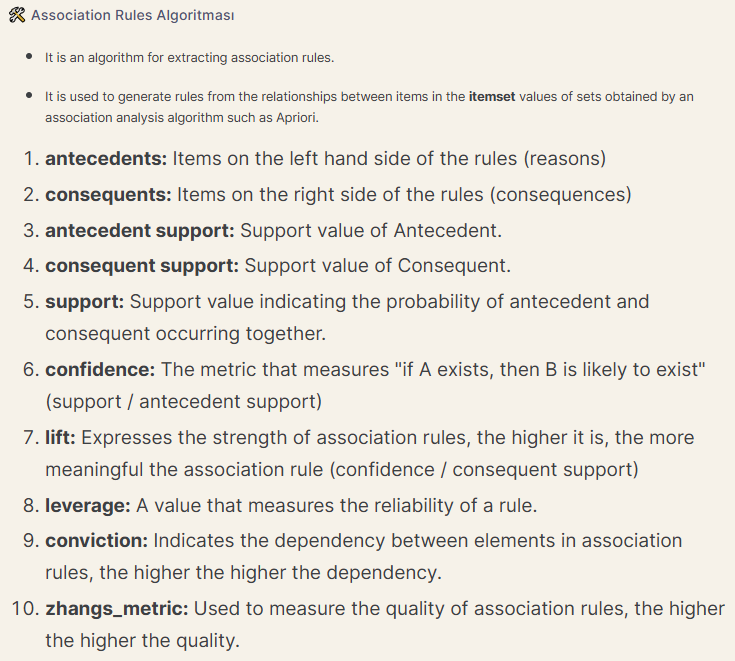

In [41]:
random_product = rules.sample(1,random_state=45)["antecedents"].explode().iloc[0]
random_product

47626

In [42]:
lime  = 26209
banana = 24852

In [43]:
def arl_recommender(rules_df, id, rec=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, k in enumerate(sorted_rules["antecedents"]):
        for j in list(k):
            if j == id :
                for k in list(sorted_rules.iloc[i]["consequents"]):
                    if k not in recommendation_list:
                        recommendation_list.append(k)

    return recommendation_list[0:rec]

In [44]:
arl_recommender(rules,random_product,5)

[26209, 21903, 24964, 21137, 24852]

## products 

In [46]:
products = pd.read_csv('data/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [47]:
def names_of_products(rules_df, bought,recommend = 5):
    
    rec = arl_recommender(rules_df,bought,recommend)

    name_of_rec={}
    bought_name = products[products["product_id"]==bought]["product_name"].iloc[0]
    for i in rec:
        name_of_rec[i] = products[products["product_id"]==i]["product_name"].iloc[0]
    recommend_df = pd.DataFrame(name_of_rec.items(), columns=["product_id","product_name"])
    print(f"Bought: {bought_name}\n")
    return recommend_df

In [48]:
names_of_products(rules,random_product,5)

Bought: Large Lemon



,product_id,product_name
0,26209,Limes
1,21903,Organic Baby Spinach
2,24964,Organic Garlic
3,21137,Organic Strawberries
4,24852,Banana


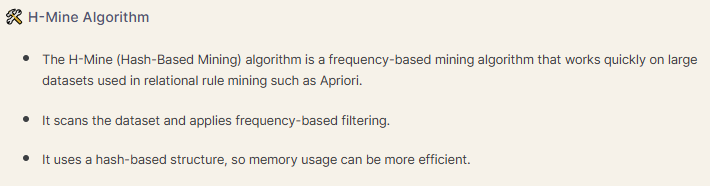

In [49]:
from mlxtend.frequent_patterns import hmine

In [50]:
frequent_itemsets = hmine(basket,min_support=0.05,use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
11508,0.545893,(24852)
6871,0.531834,(21137)
3534,0.499851,(13176)
9244,0.464862,(21903)
12523,0.417449,(26209)
...,...,...
857,0.050007,"(4920, 49683, 47766)"
10065,0.050007,"(26209, 47209, 47626, 21903, 47766)"
5048,0.050007,"(13176, 26209, 47626, 46667)"
9542,0.050007,"(24489, 26209, 21903)"


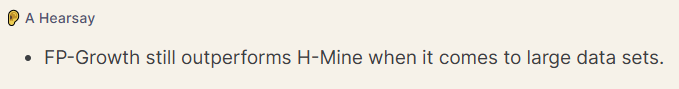

In [51]:
from mlxtend.frequent_patterns import fpgrowth

In [52]:
frequent_itemsets = fpgrowth(basket,min_support=0.05,use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
0,0.545893,(24852)
31,0.531834,(21137)
1,0.499851,(13176)
125,0.464862,(21903)
32,0.417449,(26209)
...,...,...
7389,0.050007,"(26209, 24964, 47209, 34126, 13176)"
4891,0.050007,"(26209, 40706, 16797, 21903)"
910,0.050007,"(13176, 21137, 45066, 21903)"
6027,0.050007,"(13176, 27104, 24964, 31717)"
